# Capstone Project: 'The Battle Of Neighborhoods'
## Coursera Data Science



> ## Project Report


### A) Introduction
The goal of this project is to examine the characteristics of different neighborhoods in my hometown Berlin. <br><br>
_Some facts first:_ Berlin consists of 12 boroughs (called 'Bezirke') and 96 neighborhoods (called 'Ortsteile') which are further divided into 195 smaller districts (called 'Ortslagen'). Many of these areas have developed in an individual way, influenced by geographical circumstances (e.g. east/west differences) or by the particular influx from people from all over the country and from many parts of the world. <br><br>
_Question 1:_ So given the fact that Berlin is an in-homogeneously grown, intercultural and diverse place, how can we describe the different characteristics of its 'parts'? <br><br>This question shall be answered in this project by means of Data Science. But in this diffuse form we can not immediately start working on it. So let's make some concretization. <br> 
* First of all let's specify the term 'parts': In order to get meaningful and representative results let's focus on neighborhoods ('Ortsteile') that meet certain criteria like 'size > x' or 'population > y'. The details are described later in this report. <br>
* Second, what does 'characterization' mean? For the purpose of this project 'characterizing a place X' should be understood as 'find a well-known place that X is similar to'.

This leads to... <br>
_Question 2:_ For all neighborhoods of Berlin that meet certain criteria, can we find similarities to other well-known places? <br><br>
This again leads to the question: What are well-known places and what does similar mean? For the first part let's simply take major cities like London, Paris, Tokyo etc (specified later in this report). The second part is much more difficult. When does a place resemble e.g. London? A lot of parameters come into play, like:
* population density
* life style
* diversity / intercultural things
* traffic / public transportation
* pollution
* architecture
* noisiness
* etc....

For the course of this project let's focus on the life-style parameter. We will use the foursquare API to get a sense of what life is at a certain place - like are there coffee shops, gyms, museums, parks, and so on. <br>
So the question of this project is: <br><br>
_PROJECT QUESTION:_ Do the main neighborhoods of Berlin (selected by criteria) resemble cities like London, Paris, Tokyo, Madrid, ... (specified by a list) in terms of presence of venue's like coffee shops, sushi bars, pizza restaurants , ... (provided by foursquare). <br><br>
Finally and most important: Who is interested in a question like this? <br><br>

  Party  | Why interested?
  ------------- | -------------
Tourism Marketing  | creating interesting tours
Tourists  | Sightseeing
People moving to Berlin | focused apartment search
city hall | urban development
architects | engaging in certain areas



### B) Data
__1)__ Data: Berlin Data - boroughs and neighborhoods <br>
Format: html <br>
Source: wikipedia https://de.wikipedia.org/wiki/Liste_der_Bezirke_und_Ortsteile_Berlins<br>
<br>
__2)__ Data: Location Data <br>
Format: geopy.geocoders.Nominatim _result(float)_<br>
Source: geopy API <br>
<br>
__3)__ Data: Venue Data <br>
Format: json <br>
Source: foursquare API <br>
<br>
__4)__ Data: City coordinates <br>
Format: _manual_ <br>
Source: https://www.laengengrad-breitengrad.de/ <br>

### C) Methodology
The step by step process is as follows: <br><br>
__1)__ Create a dataframe that contains data about neighborhoods of Berlin <br>
>_a)_ Send HTTP-request to wikipedia (url see Data-Section 1)) and receive a HTML-Response<br>
_b)_ Parse HTML to find the table, that contains the required data<br>
_c)_ Put the result into a Pandas DataFrame<br>
_d)_ Clean data such as, remove white-spaces, fix format, rename columns<br>
_e)_ keep only neighborhoods that have size > 5 km^2 __and__ have more than 20.000 citizens __and__ more than 5.000 citizens per km^2. Drop the rest. <br>
<img src="https://github.com/mscschliemann/Coursera_Capstone/blob/master/IMG1.JPG" alt="Alt text that describes the graphic" title="Title text" />

__2)__ For the following cities add 1 row per city to the dataframe. Then lookup the geolocations (Latitude, Longitude) for each row and add it.
* London
* Paris
* Madrid
* Moskow
* Peking
* Tokyo
* New York
* Sydney

The last 10 rows of the dataframe look then like this:
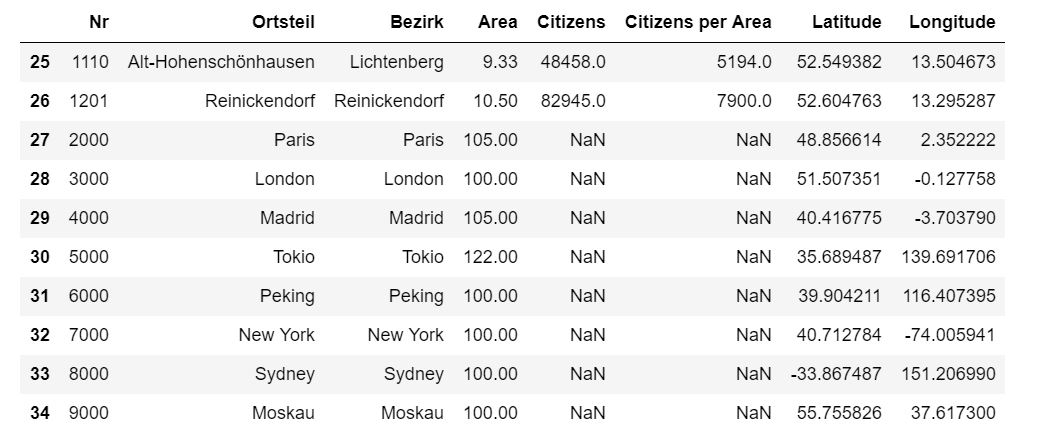

__3)__ Via Foursquare the venues for each location are retrieved.
>_a)_ The involved neighboorhoods have different sizes. So when we send a query for venua data, we want to submit appropriate radius-values, i.e. large radius for large neighborhoods and small radius for small neighborhoods. We assume that neighborhoods are approximatly of circular shape and use the formlula $A = pi * r^2$. <br>
_b)_ For the cities we compare with (see 2)) we assume a size of 100 $km^2$ to make everything comparable and avoid the outskurts.<br>
_c)_ Calculate the mean occurence of each venue category for each neighborhood / city and create a dataframe that can be fed into the K-Mean algorith. <br>

__4)__ Run the K-Means clustering algorithm
>_a)_ Set the 8 Compare-To-Cities as initial mean-values (centroids)<br>
_b)_ Run K-Means

This is the list of resulting clusters:

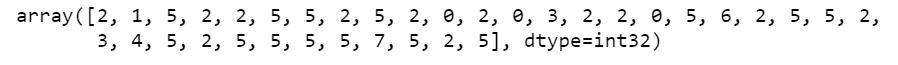

__5)__ Explore each cluster
>_a)_ Finally display a folium map that shows the different clusters <br>
_b)_ Additionally show each cluster in a tabular form

### D) Results

__1)__ Map of Berlin-Neighborhoods that are going to be analyzed. The different sizes are taken into account.

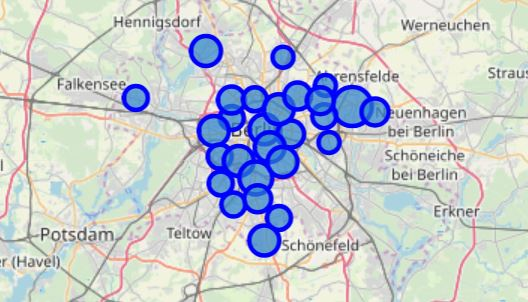

__2)__ To remember: The Question is what neighborhood resembles which city? The K-Means algorithm delivered a solution in terms of clusters that are presented in the following:
>_cluster 0 __('London-like')__:_ 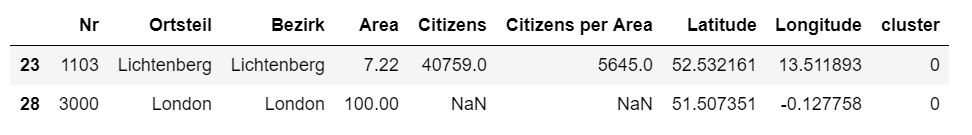
_cluster 1 __('Class-Of-Its-Own')__:_ 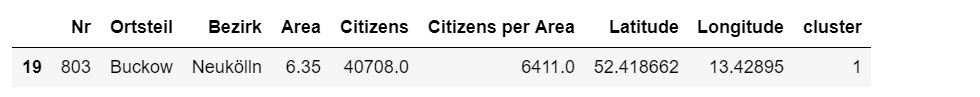
_cluster 2 __('Don't resemble any international City')__ :_ 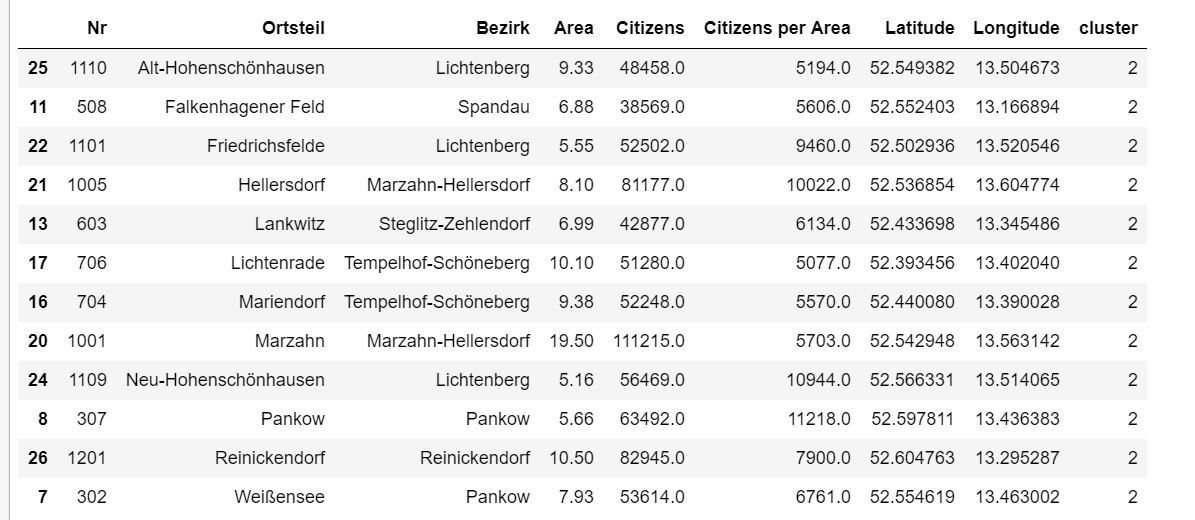
_cluster 3 __('Madrid / New York / Paris - like: Mitte')__ :_ 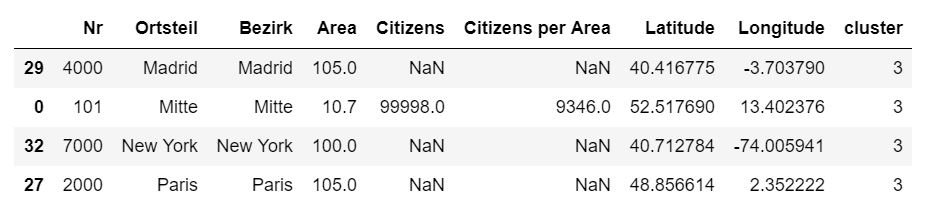
_cluster 4 __('Peking alone')__:_ 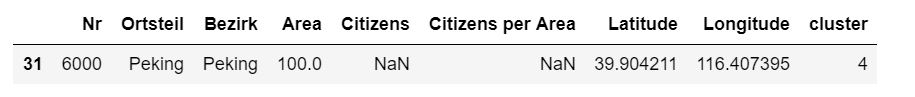
_cluster 5 __('Sydney Cluster')__:_ 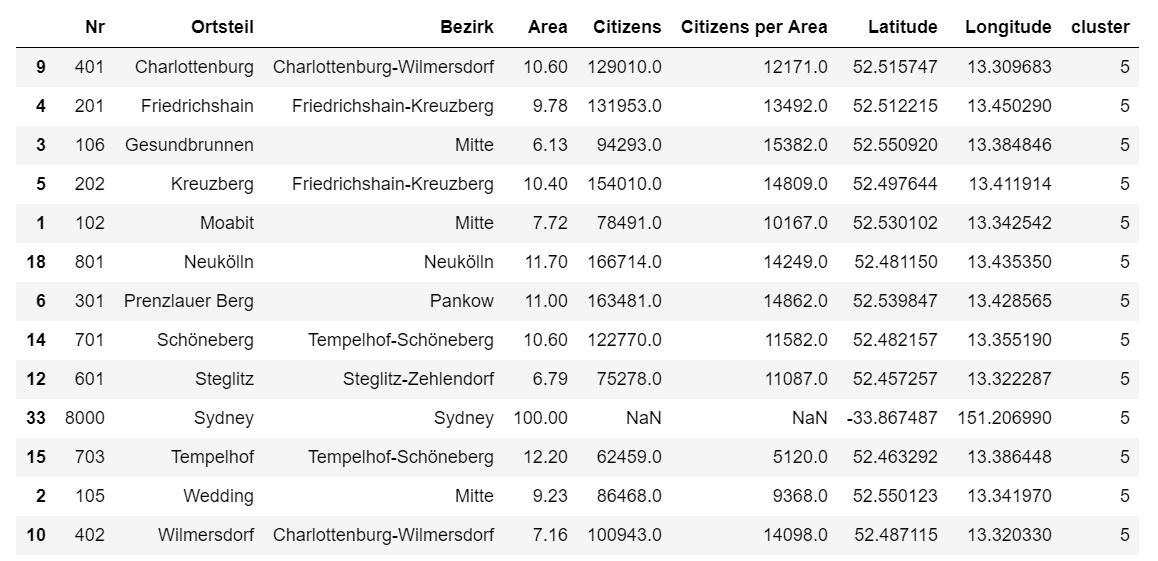
_cluster 6:__('Moskow alone)__:_ 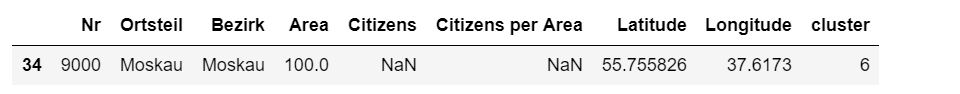
_cluster 7:__('Tokyo unmatched')__:_ 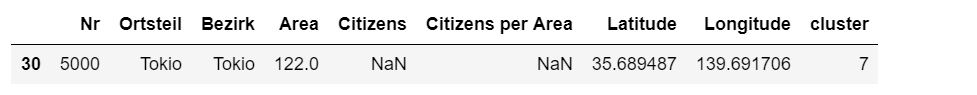

__3)__ Map of Clusters

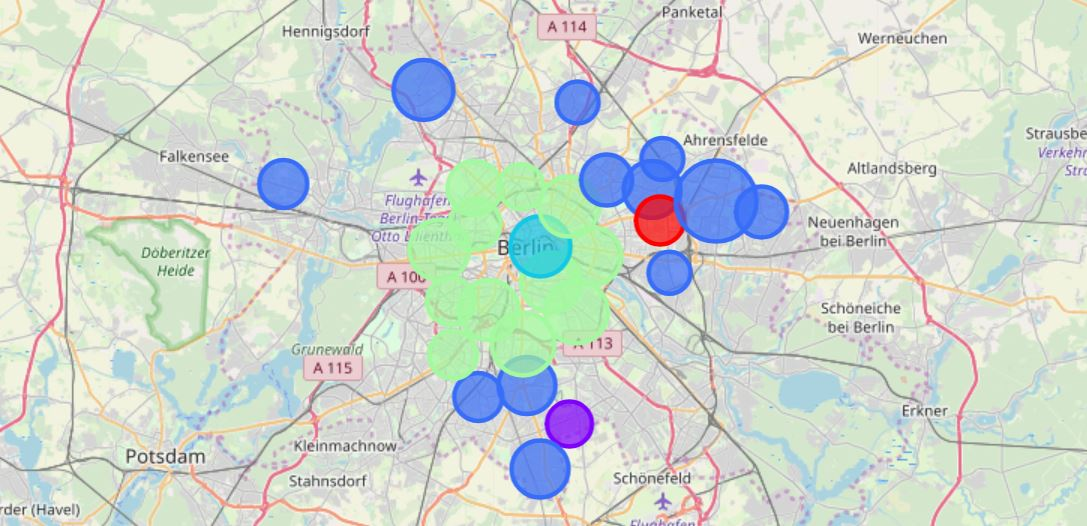


### E) Discussion
>_cluster 0 __('London-like')__:_ There is exactly one Berlin-neighorhood that compares to London: Lichtenberg. This is a little bit surprising, because personally I never was reminded to London when I walked throug Lichtenberg. But maybe the next time I see it with different eyes.<br><br>
_cluster 1 __('Class-Of-Its-Own')__:_ Buckow seems to be different from all other places. It does not fall into any other cluster and so sticks out among the neighborhoods of Berlin.<br><br>
_cluster 2 __('Doesn't resemble any City')__ :_ These are the neighborhoods that resemble each other, but have not much in common with the international cities from our list. Maybe these are the 'typically Berlin type' neighborhoods.<br><br>
_cluster 3 __('Madrid / New York / Paris - like: Mitte')__ :_ Unsurprisingly Mitte (= 'Downtown') is most similar to international cities. Mitte resembles Madrid, New York and Paris.<br><br>
_cluster 5 __('Sydney Cluster')__:_ Most of all Berlin-neighborhoods fall into the cluster of Sydney. Among them are the most hip places of Berlin like Kreuzberg, Prenzlberg, Friedrichshain. <br><br>
_cluster 6:__('Moskow alone)__:_ It is most surpring that no Berlin-neighborhood seems to have common flavor to Moskow, because there are many russian restaurants, grocery stores, in east Berlin. <br><br>
_cluster 7:__('Tokyo unmatched')__:_ Althoug there are a lot of Sushi, Ramen and Okonomiyaki restaurants, Manga book stores, japanese culture exchange centers and many more in Berlin, there is no match with Tokyo. <br>

### F) Conclusion 
Looking at the results there have been quite a few interesting insights for me personally about my home town. However, I think this approach can lead even further. Variations on some of the parameters could gain more insight. Future projects should extend into the following directions:<br><br>
__1)__ Varying the list of Compare-To-Cities<br><br>
__2)__ Relying not only on 'Foursquarte-Venue-Date', but also taking other data as relevant for clustering, like: climate data, demographic data, political or religious environment, etc...<br><br>
__3)__ Most important: Following customer-feedback there are opportunities to integrate further questions from the business and so to refine this model.